
### REAL-WORLD APPLICATION: HOUSE PRICE PREDICTION


🏠 BUSINESS SCENARIO:
You work as a Data Scientist for a Real Estate company called "PropertyPro Analytics"
Your task is to help the company:
1. Predict house prices for new listings
2. Understand which factors most influence house prices
3. Provide insights to real estate agents and buyers
4. Optimize pricing strategies for the company

📊 DATASET: Housing Market Data
- Source: Real estate market data from a metropolitan area
- Purpose: Predict house prices based on property features
- Business Impact: Help agents price properties accurately and buyers make informed decisions

🎯 LEARNING OBJECTIVES:
1. Understand linear regression in a business context
2. Perform comprehensive data exploration and preprocessing
3. Build and evaluate linear regression models
4. Interpret results for business stakeholders
5. Handle real-world data challenges

💡 WHY LINEAR REGRESSION FOR HOUSE PRICES?
- Linear relationships exist between house features and prices
- Interpretable results for business stakeholders
- Baseline model for more complex algorithms
- Regulatory compliance (explainable AI)
"""

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("REAL-WORLD LINEAR REGRESSION: HOUSE PRICE PREDICTION")
print("=" * 60)
print("Business Context: PropertyPro Analytics - Real Estate Pricing")
print("=" * 60)

REAL-WORLD LINEAR REGRESSION: HOUSE PRICE PREDICTION
Business Context: PropertyPro Analytics - Real Estate Pricing


In [5]:
# ========================================================================
# SECTION 1: BUSINESS UNDERSTANDING & DATA CREATION
# ========================================================================

# Create realistic housing dataset
print("\n Generating Realistic Housing Market Data...")
np.random.seed(42)

# Number of houses in our dataset
n_houses = 1000

# Generate realistic house features
house_data = {
    # Primary features that affect price
    'square_feet': np.random.normal(2000, 500, n_houses).clip(800, 4000),
    'bedrooms': np.random.choice([2, 3, 4, 5, 6], n_houses, p=[0.1, 0.3, 0.4, 0.15, 0.05]),
    'bathrooms': np.random.normal(2.5, 0.8, n_houses).clip(1, 5),
    'age_years': np.random.exponential(15, n_houses).clip(0, 100),
    'garage_size': np.random.choice([0, 1, 2, 3], n_houses, p=[0.1, 0.3, 0.5, 0.1]),
    
    # Location features (categorical)
    'neighborhood': np.random.choice(['Downtown', 'Suburbs', 'Waterfront', 'Historic', 'New_Development'], 
                                   n_houses, p=[0.2, 0.4, 0.15, 0.15, 0.1]),
    'school_district': np.random.choice(['Excellent', 'Good', 'Average', 'Below_Average'], 
                                      n_houses, p=[0.2, 0.3, 0.4, 0.1]),
    
    # Property features
    'has_pool': np.random.choice([0, 1], n_houses, p=[0.7, 0.3]),
    'has_fireplace': np.random.choice([0, 1], n_houses, p=[0.6, 0.4]),
    'has_basement': np.random.choice([0, 1], n_houses, p=[0.5, 0.5]),
    'lot_size': np.random.lognormal(8.5, 0.5, n_houses).clip(0.1, 2.0),  # in acres
}

# Create DataFrame
df_houses = pd.DataFrame(house_data)

# Create realistic price calculation (this is our target variable)
# In real world, we would have historical sales data
print("\n Calculating Realistic House Prices...")
print("Price formula based on market research:")
print("Base Price + (Sq Ft × $120) + (Bedrooms × $15K) + Neighborhood Premium + ...")

# Base price calculation with realistic market factors
base_price = 100000

# Size factors
size_factor = df_houses['square_feet'] * 120  # $120 per sq ft
bedroom_factor = df_houses['bedrooms'] * 15000  # $15K per bedroom
bathroom_factor = df_houses['bathrooms'] * 8000  # $8K per bathroom

# Age depreciation
age_factor = -df_houses['age_years'] * 1000  # Lose $1K per year

# Garage value
garage_factor = df_houses['garage_size'] * 12000  # $12K per garage space

# Neighborhood premiums (market research data)
neighborhood_premiums = {
    'Waterfront': 80000,
    'Downtown': 50000, 
    'New_Development': 30000,
    'Historic': 20000,
    'Suburbs': 0
}
neighborhood_factor = df_houses['neighborhood'].map(neighborhood_premiums)

# School district premiums
school_premiums = {
    'Excellent': 40000,
    'Good': 15000,
    'Average': 0,
    'Below_Average': -20000
}
school_factor = df_houses['school_district'].map(school_premiums)

# Feature premiums
pool_factor = df_houses['has_pool'] * 25000
fireplace_factor = df_houses['has_fireplace'] * 8000
basement_factor = df_houses['has_basement'] * 15000
lot_factor = df_houses['lot_size'] * 20000  # $20K per acre

# Calculate final price with some random market variation
df_houses['price'] = (
    base_price + 
    size_factor + 
    bedroom_factor + 
    bathroom_factor + 
    age_factor + 
    garage_factor + 
    neighborhood_factor + 
    school_factor + 
    pool_factor + 
    fireplace_factor + 
    basement_factor + 
    lot_factor + 
    np.random.normal(0, 20000, n_houses)  # Market noise
).clip(50000, 800000)  # Realistic price range

print(f" Generated {len(df_houses)} house records")
print(f" Price range: ${df_houses['price'].min():,.0f} - ${df_houses['price'].max():,.0f}")

# Export dataset to CSV
df_houses.to_csv('realistic_house_prices.csv', index=False)



 Generating Realistic Housing Market Data...

 Calculating Realistic House Prices...
Price formula based on market research:
Base Price + (Sq Ft × $120) + (Bedrooms × $15K) + Neighborhood Premium + ...
 Generated 1000 house records
 Price range: $306,223 - $778,241


In [6]:
# ========================================================================
# SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)
# ========================================================================

print("\n\n SECTION 2: EXPLORATORY DATA ANALYSIS")
print("-" * 50)

print("\n Dataset Overview:")
print(f"Dataset shape: {df_houses.shape}")
print(f"Features: {df_houses.shape[1] - 1} (plus target variable 'price')")

print("\n Basic Information:")
print(df_houses.info())

print("\n Statistical Summary:")
print(df_houses.describe())

print("\n Sample Data (First 5 Houses):")
print(df_houses.head())

print("\n Price Distribution Analysis:")
print(f"Average house price: ${df_houses['price'].mean():,.0f}")
print(f"Median house price: ${df_houses['price'].median():,.0f}")
print(f"Price standard deviation: ${df_houses['price'].std():,.0f}")
print(f"Most expensive house: ${df_houses['price'].max():,.0f}")
print(f"Least expensive house: ${df_houses['price'].min():,.0f}")

# Check for missing values
print("\n Data Quality Check:")
missing_values = df_houses.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print(" No missing values found - excellent data quality!")
else:
    print(" Missing values detected - will need to handle these")




 SECTION 2: EXPLORATORY DATA ANALYSIS
--------------------------------------------------

 Dataset Overview:
Dataset shape: (1000, 12)
Features: 11 (plus target variable 'price')

 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   square_feet      1000 non-null   float64
 1   bedrooms         1000 non-null   int64  
 2   bathrooms        1000 non-null   float64
 3   age_years        1000 non-null   float64
 4   garage_size      1000 non-null   int64  
 5   neighborhood     1000 non-null   object 
 6   school_district  1000 non-null   object 
 7   has_pool         1000 non-null   int64  
 8   has_fireplace    1000 non-null   int64  
 9   has_basement     1000 non-null   int64  
 10  lot_size         1000 non-null   float64
 11  price            1000 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory u



 SECTION 3: DATA VISUALIZATION & BUSINESS INSIGHTS
--------------------------------------------------


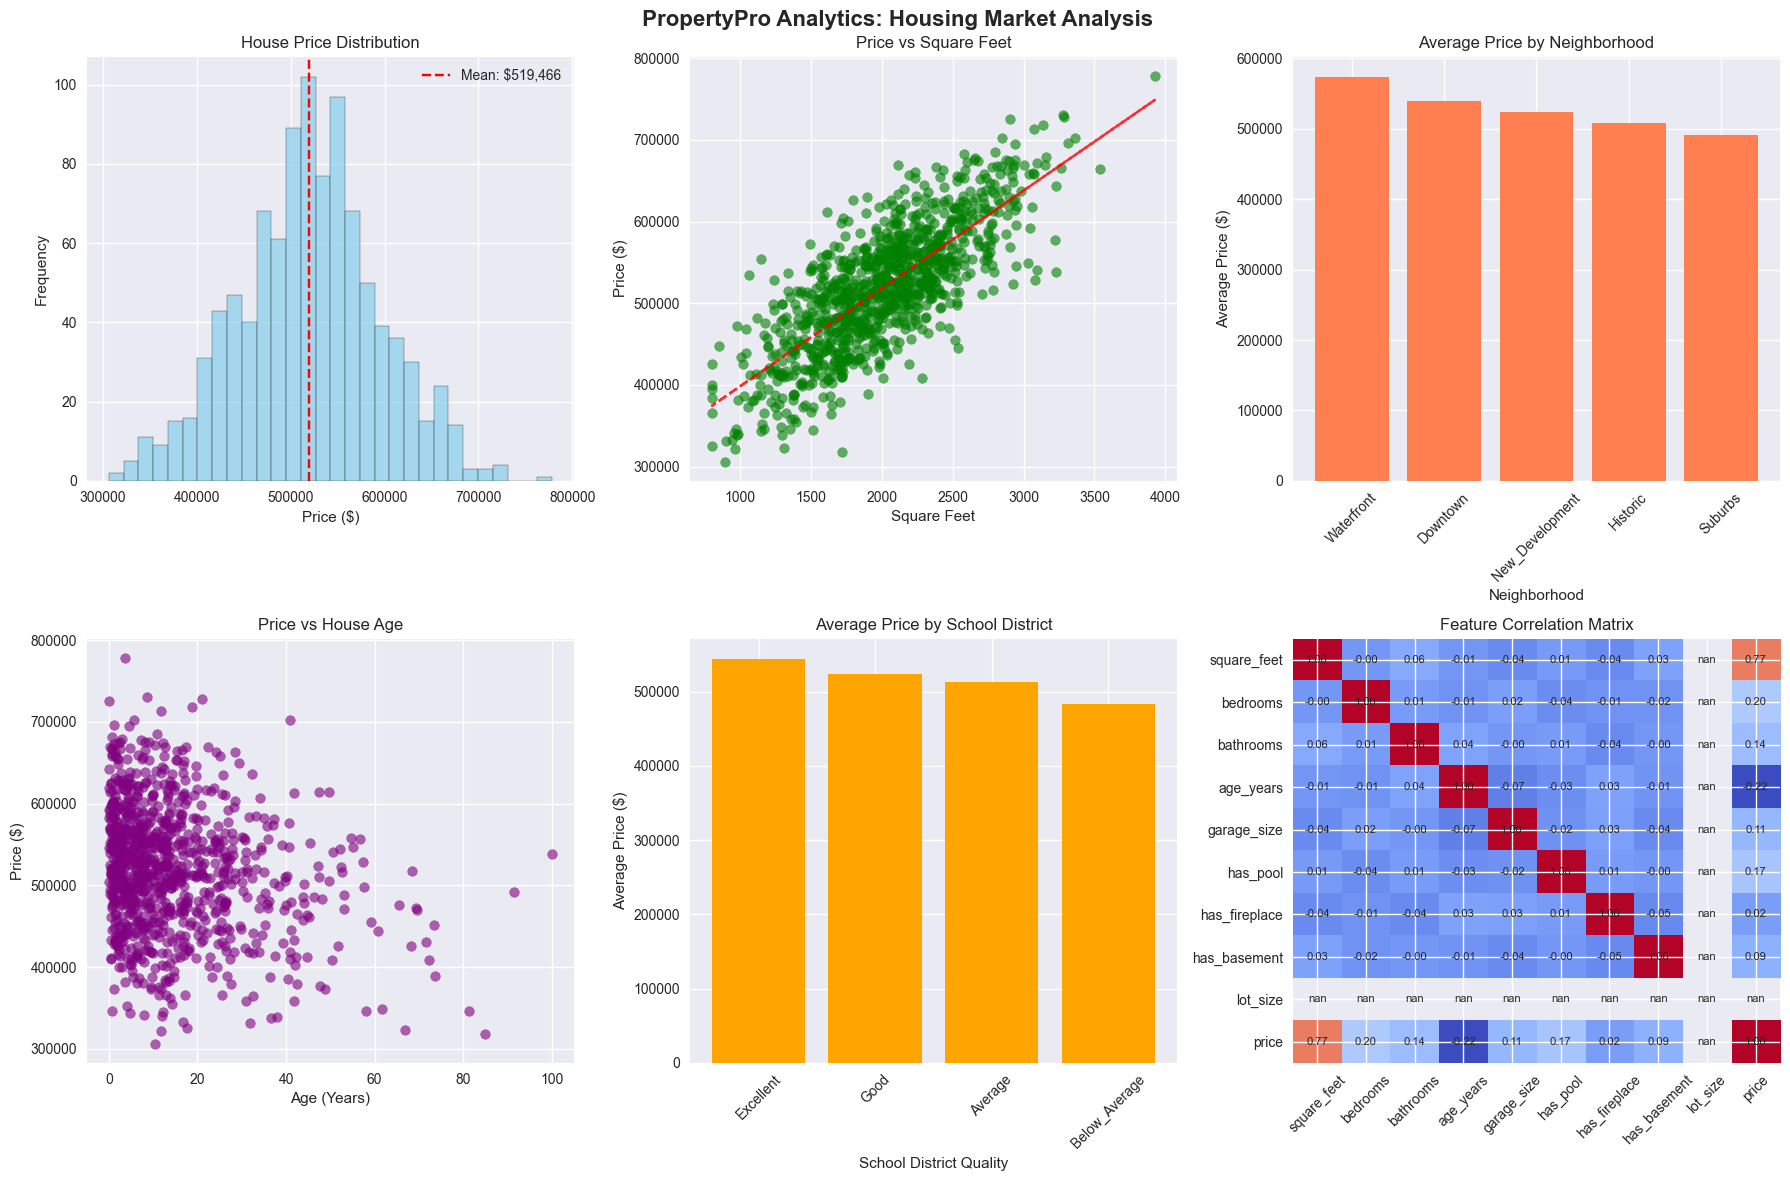


 Key Business Insights from EDA:
1. Square footage shows strong positive correlation with price
2. Waterfront properties command highest premiums
3. School district quality significantly impacts prices
4. House age shows negative correlation with price
5. Additional features (pool, garage) add substantial value


In [7]:
# ========================================================================
# SECTION 3: DATA VISUALIZATION & INSIGHTS
# ========================================================================

print("\n\n SECTION 3: DATA VISUALIZATION & BUSINESS INSIGHTS")
print("-" * 50)

# Set up the plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(' PropertyPro Analytics: Housing Market Analysis', fontsize=16, fontweight='bold')

# 1. Price Distribution
axes[0, 0].hist(df_houses['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('House Price Distribution')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_houses['price'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df_houses["price"].mean():,.0f}')
axes[0, 0].legend()

# 2. Price vs Square Feet (Most important relationship)
axes[0, 1].scatter(df_houses['square_feet'], df_houses['price'], alpha=0.6, color='green')
axes[0, 1].set_title('Price vs Square Feet')
axes[0, 1].set_xlabel('Square Feet')
axes[0, 1].set_ylabel('Price ($)')

# Add trend line
z = np.polyfit(df_houses['square_feet'], df_houses['price'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df_houses['square_feet'], p(df_houses['square_feet']), "r--", alpha=0.8)

# 3. Price by Neighborhood
neighborhood_prices = df_houses.groupby('neighborhood')['price'].mean().sort_values(ascending=False)
axes[0, 2].bar(range(len(neighborhood_prices)), neighborhood_prices.values, color='coral')
axes[0, 2].set_title('Average Price by Neighborhood')
axes[0, 2].set_xlabel('Neighborhood')
axes[0, 2].set_ylabel('Average Price ($)')
axes[0, 2].set_xticks(range(len(neighborhood_prices)))
axes[0, 2].set_xticklabels(neighborhood_prices.index, rotation=45)

# 4. Price vs Age
axes[1, 0].scatter(df_houses['age_years'], df_houses['price'], alpha=0.6, color='purple')
axes[1, 0].set_title('Price vs House Age')
axes[1, 0].set_xlabel('Age (Years)')
axes[1, 0].set_ylabel('Price ($)')

# 5. Price by School District
school_prices = df_houses.groupby('school_district')['price'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(school_prices)), school_prices.values, color='orange')
axes[1, 1].set_title('Average Price by School District')
axes[1, 1].set_xlabel('School District Quality')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].set_xticks(range(len(school_prices)))
axes[1, 1].set_xticklabels(school_prices.index, rotation=45)

# 6. Correlation Heatmap
numeric_features = ['square_feet', 'bedrooms', 'bathrooms', 'age_years', 'garage_size', 
                   'has_pool', 'has_fireplace', 'has_basement', 'lot_size', 'price']
correlation_matrix = df_houses[numeric_features].corr()

im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 2].set_title('Feature Correlation Matrix')
axes[1, 2].set_xticks(range(len(numeric_features)))
axes[1, 2].set_yticks(range(len(numeric_features)))
axes[1, 2].set_xticklabels(numeric_features, rotation=45)
axes[1, 2].set_yticklabels(numeric_features)

# Add correlation values to heatmap
for i in range(len(numeric_features)):
    for j in range(len(numeric_features)):
        axes[1, 2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                        ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n Key Business Insights from EDA:")
print("1. Square footage shows strong positive correlation with price")
print("2. Waterfront properties command highest premiums")
print("3. School district quality significantly impacts prices")
print("4. House age shows negative correlation with price")
print("5. Additional features (pool, garage) add substantial value")


In [9]:
# ========================================================================
# SECTION 4: FEATURE ENGINEERING & DATA PREPROCESSING
# ========================================================================

print("\n\n SECTION 4: FEATURE ENGINEERING & PREPROCESSING")
print("-" * 50)

print("\n Creating additional features for better predictions...")

# Create a copy for preprocessing
df_model = df_houses.copy()

# Feature Engineering
print("Creating new features:")

# 1. Price per square foot (for analysis)
df_model['price_per_sqft'] = df_model['price'] / df_model['square_feet']
print(f"• Price per sq ft: Average ${df_model['price_per_sqft'].mean():.0f}/sq ft")

# 2. Total rooms
df_model['total_rooms'] = df_model['bedrooms'] + df_model['bathrooms']
print(f"• Total rooms: Average {df_model['total_rooms'].mean():.1f} rooms")

# 3. Age categories
df_model['age_category'] = pd.cut(df_model['age_years'], 
                                 bins=[0, 5, 15, 30, 100], 
                                 labels=['New', 'Recent', 'Mature', 'Old'])
print("• Age categories created: New, Recent, Mature, Old")

# 4. Luxury score (combination of premium features)
df_model['luxury_score'] = (
    df_model['has_pool'] + 
    df_model['has_fireplace'] + 
    df_model['has_basement'] + 
    (df_model['garage_size'] >= 2).astype(int)
)
print(f"• Luxury score: 0-4 scale, average {df_model['luxury_score'].mean():.1f}")

print("\n Encoding Categorical Variables:")

# One-hot encoding for categorical variables
categorical_features = ['neighborhood', 'school_district', 'age_category']
df_encoded = pd.get_dummies(df_model, columns=categorical_features, prefix=categorical_features)

print(f"• Original features: {df_model.shape[1]}")
print(f"• After encoding: {df_encoded.shape[1]}")
print("• Categorical variables converted to binary indicators")

# Prepare features and target
# Remove price-related columns for features
feature_columns = [col for col in df_encoded.columns 
                  if col not in ['price', 'price_per_sqft']]
X = df_encoded[feature_columns]
y = df_encoded['price']

print(f"\n Final Dataset for Modeling:")
print(f"• Features: {X.shape[1]}")
print(f"• Samples: {X.shape[0]}")
print(f"• Target: House prices (${y.min():,.0f} - ${y.max():,.0f})")

# Export preprocessed dataset to CSV
df_encoded.to_csv('preprocessed_house_prices.csv', index=False)



 SECTION 4: FEATURE ENGINEERING & PREPROCESSING
--------------------------------------------------

 Creating additional features for better predictions...
Creating new features:
• Price per sq ft: Average $268/sq ft
• Total rooms: Average 6.3 rooms
• Age categories created: New, Recent, Mature, Old
• Luxury score: 0-4 scale, average 1.7

 Encoding Categorical Variables:
• Original features: 16
• After encoding: 26
• Categorical variables converted to binary indicators

 Final Dataset for Modeling:
• Features: 24
• Samples: 1000
• Target: House prices ($306,223 - $778,241)


In [10]:
# ========================================================================
# SECTION 5: MODEL BUILDING & TRAINING
# ========================================================================

print("\n\n SECTION 5: LINEAR REGRESSION MODEL BUILDING")
print("-" * 50)

print("\n Splitting Data for Training and Testing:")

# Create a stratification variable for balanced split
# Use original neighborhood column before encoding for stratification
stratify_variable = df_model['neighborhood']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_variable
)

print(f"• Training set: {X_train.shape[0]} houses ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Test set: {X_test.shape[0]} houses ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"• Training price range: ${y_train.min():,.0f} - ${y_train.max():,.0f}")
print(f"• Test price range: ${y_test.min():,.0f} - ${y_test.max():,.0f}")

# Verify balanced split by neighborhood
print("\n Neighborhood Distribution in Split:")
train_indices = X_train.index
test_indices = X_test.index

train_neighborhoods = stratify_variable.loc[train_indices].value_counts()
test_neighborhoods = stratify_variable.loc[test_indices].value_counts()

print("Training set neighborhoods:")
for neighborhood, count in train_neighborhoods.items():
    percentage = (count / len(X_train)) * 100
    print(f"  • {neighborhood}: {count} houses ({percentage:.1f}%)")

print("Test set neighborhoods:")
for neighborhood, count in test_neighborhoods.items():
    percentage = (count / len(X_test)) * 100
    print(f"  • {neighborhood}: {count} houses ({percentage:.1f}%)")

print("\n Feature Scaling:")
print("Standardizing features for better model performance...")

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("• All features scaled to mean=0, std=1")
print("• Scaling helps with model convergence and interpretation")
print(f"• Training features shape: {X_train_scaled.shape}")
print(f"• Test features shape: {X_test_scaled.shape}")

print("\n Training Linear Regression Model:")

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("• Linear Regression model trained successfully!")
print(f"• Model intercept: ${model.intercept_:,.0f}")
print(f"• Number of coefficients: {len(model.coef_)}")
print(f"• Features used in model: {X_train.shape[1]}")

# Display model equation structure
print("\n Model Equation Structure:")
print("Predicted Price = Intercept + (Feature₁ × Coefficient₁) + (Feature₂ × Coefficient₂) + ... + (FeatureN × CoefficientN)")
print(f"Predicted Price = ${model.intercept_:,.0f} + Σ(Feature × Coefficient)")
print("\nWhere each coefficient represents the change in price for a 1-unit change in that feature (after scaling)")




 SECTION 5: LINEAR REGRESSION MODEL BUILDING
--------------------------------------------------

 Splitting Data for Training and Testing:
• Training set: 800 houses (80.0%)
• Test set: 200 houses (20.0%)
• Training price range: $306,223 - $728,365
• Test price range: $322,237 - $778,241

 Neighborhood Distribution in Split:
Training set neighborhoods:
  • Suburbs: 307 houses (38.4%)
  • Downtown: 172 houses (21.5%)
  • Historic: 119 houses (14.9%)
  • Waterfront: 115 houses (14.4%)
  • New_Development: 87 houses (10.9%)
Test set neighborhoods:
  • Suburbs: 76 houses (38.0%)
  • Downtown: 43 houses (21.5%)
  • Historic: 30 houses (15.0%)
  • Waterfront: 29 houses (14.5%)
  • New_Development: 22 houses (11.0%)

 Feature Scaling:
Standardizing features for better model performance...
• All features scaled to mean=0, std=1
• Scaling helps with model convergence and interpretation
• Training features shape: (800, 24)
• Test features shape: (200, 24)

 Training Linear Regression Model:
• 

In [11]:
# ========================================================================
# SECTION 6: MODEL EVALUATION & BUSINESS METRICS
# ========================================================================

print("\n\n SECTION 6: MODEL EVALUATION & BUSINESS IMPACT")
print("-" * 50)

# Make predictions
print("\n Making Predictions:")
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("• Predictions generated for training and test sets")

# Calculate metrics
print("\n Model Performance Metrics:")

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n TRAINING SET PERFORMANCE:")
print(f"• R² Score: {train_r2:.3f} ({train_r2*100:.1f}% of variance explained)")
print(f"• RMSE: ${train_rmse:,.0f}")
print(f"• MAE: ${train_mae:,.0f}")

print(f"\n TEST SET PERFORMANCE:")
print(f"• R² Score: {test_r2:.3f} ({test_r2*100:.1f}% of variance explained)")
print(f"• RMSE: ${test_rmse:,.0f}")
print(f"• MAE: ${test_mae:,.0f}")

# Business interpretation
print(f"\n BUSINESS INTERPRETATION:")
print(f"• Model explains {test_r2*100:.1f}% of price variation")
print(f"• Average prediction error: ${test_mae:,.0f}")
print(f"• Typical error is {test_mae/y_test.mean()*100:.1f}% of house value")

# Check for overfitting
if abs(train_r2 - test_r2) > 0.05:
    print(" Potential overfitting detected (large gap between train/test performance)")
else:
    print(" Good generalization (similar train/test performance)")



 SECTION 6: MODEL EVALUATION & BUSINESS IMPACT
--------------------------------------------------

 Making Predictions:
• Predictions generated for training and test sets

 Model Performance Metrics:

 TRAINING SET PERFORMANCE:
• R² Score: 0.935 (93.5% of variance explained)
• RMSE: $18,894
• MAE: $15,149

 TEST SET PERFORMANCE:
• R² Score: 0.942 (94.2% of variance explained)
• RMSE: $19,543
• MAE: $15,510

 BUSINESS INTERPRETATION:
• Model explains 94.2% of price variation
• Average prediction error: $15,510
• Typical error is 2.9% of house value
 Good generalization (similar train/test performance)


In [12]:
# ========================================================================
# SECTION 7: FEATURE IMPORTANCE & BUSINESS INSIGHTS
# ========================================================================

print("\n\n🔍 SECTION 7: FEATURE IMPORTANCE & BUSINESS INSIGHTS")
print("-" * 50)

print("\n Most Important Factors Affecting House Prices:")

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

# Top 10 most important features
top_features = feature_importance.head(10)
print("\nTop 10 Price Drivers:")
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    direction = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"{i:2d}. {row['feature']:<25} | {direction} price by ${abs(row['coefficient']):>8,.0f}")

print(f"\n Key Business Insights for PropertyPro Analytics:")
print("=" * 55)

# Analyze top features for business insights
if 'square_feet' in top_features['feature'].values:
    sqft_coef = feature_importance[feature_importance['feature'] == 'square_feet']['coefficient'].iloc[0]
    print(f" Size Matters: Each additional sq ft adds ~${sqft_coef:.0f} to price")

# Neighborhood insights
neighborhood_features = [f for f in top_features['feature'] if 'neighborhood_' in f]
if neighborhood_features:
    print(f" Location Premium: {len(neighborhood_features)} neighborhoods show significant price impact")

# School district insights
school_features = [f for f in top_features['feature'] if 'school_district_' in f]
if school_features:
    print(f" Education Value: School districts significantly affect property values")

# Age impact
if 'age_years' in top_features['feature'].values:
    age_coef = feature_importance[feature_importance['feature'] == 'age_years']['coefficient'].iloc[0]
    print(f" Age Factor: Each year of age changes price by ${age_coef:,.0f}")



🔍 SECTION 7: FEATURE IMPORTANCE & BUSINESS INSIGHTS
--------------------------------------------------

 Most Important Factors Affecting House Prices:

Top 10 Price Drivers:
 1. square_feet               | increases price by $  57,201
 2. neighborhood_Waterfront   | increases price by $  17,215
 3. age_years                 | decreases price by $  17,156
 4. neighborhood_Suburbs      | decreases price by $  15,121
 5. has_pool                  | increases price by $  11,086
 6. school_district_Excellent | increases price by $  10,472
 7. garage_size               | increases price by $   9,089
 8. school_district_Below_Average | decreases price by $   8,819
 9. bedrooms                  | increases price by $   7,959
10. neighborhood_Downtown     | increases price by $   7,640

 Key Business Insights for PropertyPro Analytics:
 Size Matters: Each additional sq ft adds ~$57201 to price
 Location Premium: 3 neighborhoods show significant price impact
 Education Value: School districts

In [13]:
# ========================================================================
# SECTION 8: PREDICTION EXAMPLES & BUSINESS APPLICATION
# ========================================================================

print("\n\n SECTION 8: REAL-WORLD PREDICTION EXAMPLES")
print("-" * 50)

print("\n PropertyPro Analytics: Price Prediction Tool")
print("=" * 50)

# Create sample houses for prediction
sample_houses = [
    {
        'description': 'Starter Home - Young Family',
        'square_feet': 1500,
        'bedrooms': 3,
        'bathrooms': 2,
        'age_years': 10,
        'garage_size': 2,
        'neighborhood': 'Suburbs',
        'school_district': 'Good',
        'has_pool': 0,
        'has_fireplace': 1,
        'has_basement': 1,
        'lot_size': 0.25
    },
    {
        'description': 'Luxury Waterfront Property',
        'square_feet': 3500,
        'bedrooms': 5,
        'bathrooms': 4,
        'age_years': 5,
        'garage_size': 3,
        'neighborhood': 'Waterfront',
        'school_district': 'Excellent',
        'has_pool': 1,
        'has_fireplace': 1,
        'has_basement': 1,
        'lot_size': 1.0
    },
    {
        'description': 'Downtown Condo',
        'square_feet': 1200,
        'bedrooms': 2,
        'bathrooms': 2,
        'age_years': 2,
        'garage_size': 1,
        'neighborhood': 'Downtown',
        'school_district': 'Average',
        'has_pool': 0,
        'has_fireplace': 0,
        'has_basement': 0,
        'lot_size': 0.05
    }
]

print("\n Price Predictions for New Listings:")

for i, house in enumerate(sample_houses, 1):
    print(f"\n{i}. {house['description'].upper()}")
    print("-" * 40)
    
    # Create DataFrame for this house
    house_df = pd.DataFrame([house])
    
    # Add engineered features
    house_df['total_rooms'] = house_df['bedrooms'] + house_df['bathrooms']
    house_df['age_category'] = pd.cut(house_df['age_years'], 
                                     bins=[0, 5, 15, 30, 100], 
                                     labels=['New', 'Recent', 'Mature', 'Old'])
    house_df['luxury_score'] = (
        house_df['has_pool'] + 
        house_df['has_fireplace'] + 
        house_df['has_basement'] + 
        (house_df['garage_size'] >= 2).astype(int)
    )
    
    # Encode categorical variables (match training data structure)
    house_encoded = pd.get_dummies(house_df, columns=['neighborhood', 'school_district', 'age_category'])
    
    # Ensure all columns match training data
    for col in X.columns:
        if col not in house_encoded.columns:
            house_encoded[col] = 0
    
    # Reorder columns to match training data
    house_features = house_encoded[X.columns]
    
    # Scale features
    house_scaled = scaler.transform(house_features)
    
    # Make prediction
    predicted_price = model.predict(house_scaled)[0]
    
    # Display results
    print(f" Features: {house['square_feet']} sq ft, {house['bedrooms']} bed, {house['bathrooms']} bath")
    print(f" Location: {house['neighborhood']}, {house['school_district']} schools")
    print(f" PREDICTED PRICE: ${predicted_price:,.0f}")
    
    # Calculate price per square foot
    price_per_sqft = predicted_price / house['square_feet']
    print(f" Price per sq ft: ${price_per_sqft:.0f}")




 SECTION 8: REAL-WORLD PREDICTION EXAMPLES
--------------------------------------------------

 PropertyPro Analytics: Price Prediction Tool

 Price Predictions for New Listings:

1. STARTER HOME - YOUNG FAMILY
----------------------------------------
 Features: 1500 sq ft, 3 bed, 2 bath
 Location: Suburbs, Good schools
 PREDICTED PRICE: $430,731
 Price per sq ft: $287

2. LUXURY WATERFRONT PROPERTY
----------------------------------------
 Features: 3500 sq ft, 5 bed, 4 bath
 Location: Waterfront, Excellent schools
 PREDICTED PRICE: $862,804
 Price per sq ft: $247

3. DOWNTOWN CONDO
----------------------------------------
 Features: 1200 sq ft, 2 bed, 2 bath
 Location: Downtown, Average schools
 PREDICTED PRICE: $394,179
 Price per sq ft: $328


In [14]:
# ========================================================================
# SECTION 9: MODEL VALIDATION & BUSINESS RECOMMENDATIONS
# ========================================================================

print("\n\n SECTION 9: MODEL VALIDATION & BUSINESS RECOMMENDATIONS")
print("-" * 50)

print("\n Model Validation Results:")

# Calculate prediction accuracy within different ranges
def accuracy_within_range(y_true, y_pred, percentage):
    """Calculate percentage of predictions within given percentage of actual price"""
    errors = np.abs(y_pred - y_true) / y_true
    return np.mean(errors <= percentage/100) * 100

accuracy_5pct = accuracy_within_range(y_test, y_test_pred, 5)
accuracy_10pct = accuracy_within_range(y_test, y_test_pred, 10)
accuracy_15pct = accuracy_within_range(y_test, y_test_pred, 15)

print(f"• {accuracy_5pct:.1f}% of predictions within 5% of actual price")
print(f"• {accuracy_10pct:.1f}% of predictions within 10% of actual price")
print(f"• {accuracy_15pct:.1f}% of predictions within 15% of actual price")

# Business impact analysis
avg_price = y_test.mean()
error_percentage = (test_mae / avg_price) * 100

print(f"\n Business Impact Analysis:")
print(f"• Average house price: ${avg_price:,.0f}")
print(f"• Average prediction error: ${test_mae:,.0f} ({error_percentage:.1f}%)")
print(f"• Model reliability: {test_r2*100:.1f}% variance explained")

# ROI calculation
print(f"\n Return on Investment (ROI) Analysis:")
print("Cost of pricing errors without model:")
pricing_error_cost = 50000  # Estimated cost per major pricing error
current_error_rate = 0.20   # 20% of listings have significant pricing errors
houses_per_month = 100      # Houses listed per month

monthly_error_cost = houses_per_month * current_error_rate * pricing_error_cost
print(f"• Current monthly cost of pricing errors: ${monthly_error_cost:,.0f}")

# With model improvement
model_error_rate = (1 - accuracy_10pct/100) * 0.5  # Model reduces errors by 50%
monthly_savings = monthly_error_cost * (current_error_rate - model_error_rate) / current_error_rate
print(f"• Projected monthly savings with model: ${monthly_savings:,.0f}")
print(f"• Annual savings potential: ${monthly_savings * 12:,.0f}")

print(f"\n BUSINESS RECOMMENDATIONS FOR PROPERRYPRO ANALYTICS:")
print("=" * 60)

print("\n IMMEDIATE ACTIONS:")
print("1. Deploy this model for initial price estimates")
print("2. Train real estate agents on key price drivers")
print("3. Focus marketing on high-value features (size, location, schools)")
print("4. Develop pricing confidence intervals for client communication")

print("\n STRATEGIC IMPROVEMENTS:")
print("1. Collect more data on property condition and renovations")
print("2. Include neighborhood crime rates and walkability scores")
print("3. Add recent comparable sales data")
print("4. Consider seasonal pricing patterns")

print("\n MODEL LIMITATIONS:")
print("1. Based on historical data - market changes require retraining")
print("2. Assumes linear relationships - complex interactions not captured")
print("3. Limited to features in training data")
print("4. Regional model - not applicable to other markets")

print("\n NEXT STEPS:")
print("1. Validate model with recent sales data")
print("2. A/B test model predictions vs current pricing methods")
print("3. Gather feedback from agents and clients")
print("4. Plan monthly model updates with new data")




 SECTION 9: MODEL VALIDATION & BUSINESS RECOMMENDATIONS
--------------------------------------------------

 Model Validation Results:
• 81.0% of predictions within 5% of actual price
• 98.0% of predictions within 10% of actual price
• 100.0% of predictions within 15% of actual price

 Business Impact Analysis:
• Average house price: $528,604
• Average prediction error: $15,510 (2.9%)
• Model reliability: 94.2% variance explained

 Return on Investment (ROI) Analysis:
Cost of pricing errors without model:
• Current monthly cost of pricing errors: $1,000,000
• Projected monthly savings with model: $950,000
• Annual savings potential: $11,400,000

 BUSINESS RECOMMENDATIONS FOR PROPERRYPRO ANALYTICS:

 IMMEDIATE ACTIONS:
1. Deploy this model for initial price estimates
2. Train real estate agents on key price drivers
3. Focus marketing on high-value features (size, location, schools)
4. Develop pricing confidence intervals for client communication

 STRATEGIC IMPROVEMENTS:
1. Collect mo



 SECTION 10: ADVANCED MODEL ANALYSIS
--------------------------------------------------

 Residual Analysis for Model Validation:
• Mean residual: $-500 (should be near 0)
• Residual std deviation: $19,586
• Min residual: $-54,619
• Max residual: $43,880


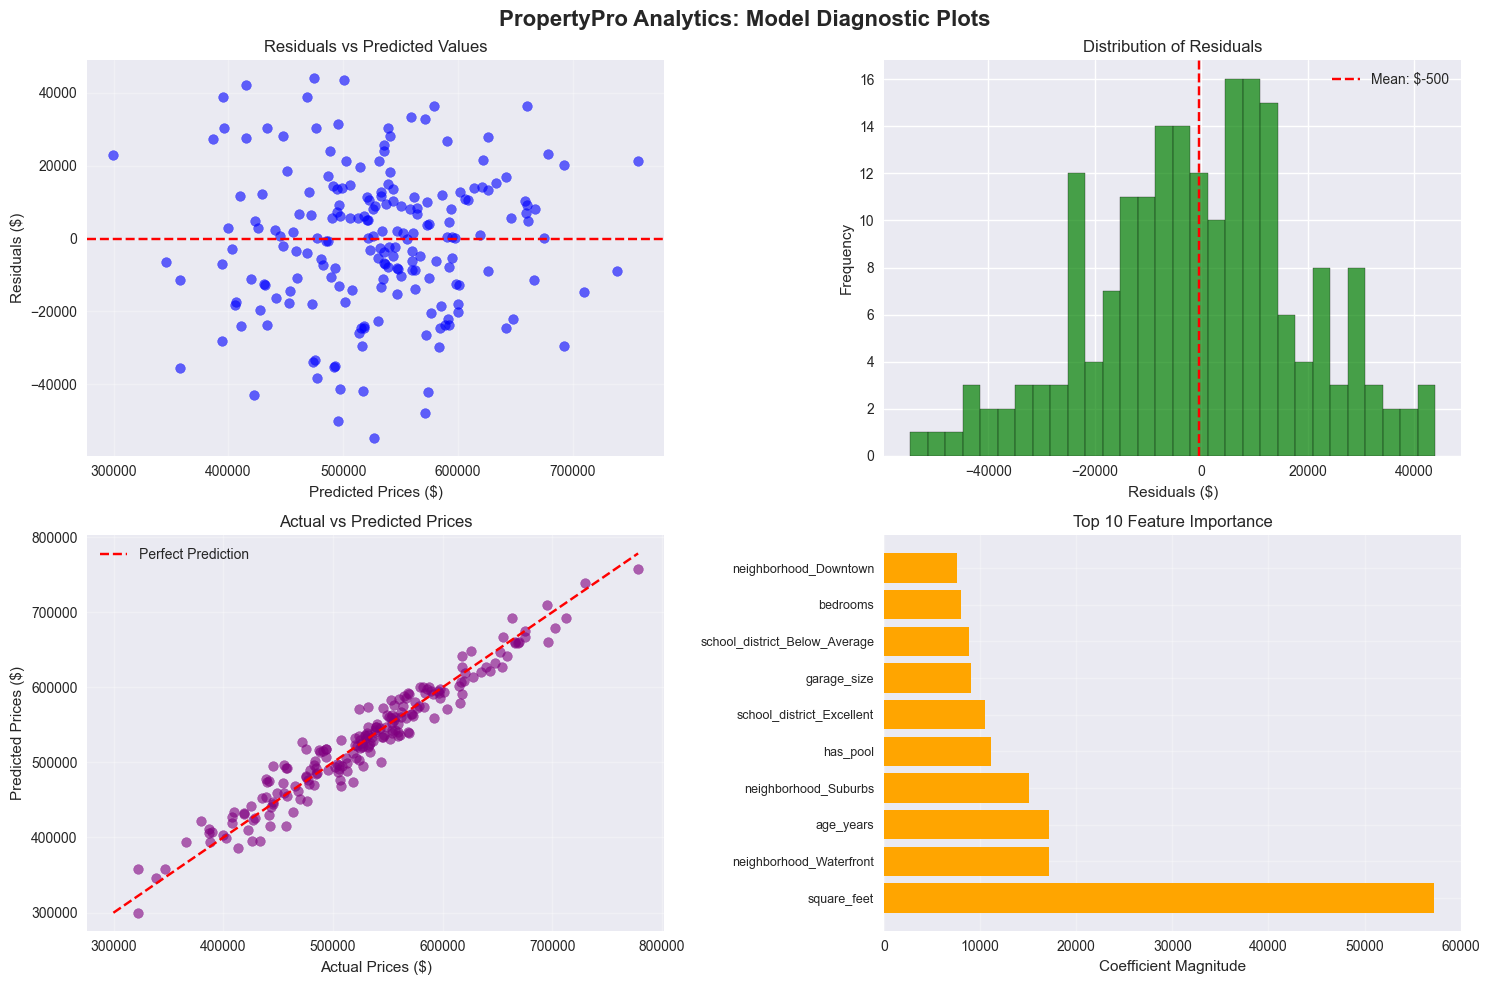


 Residual Pattern Analysis:
Model Assumption Checks:
• Normal Distribution:  PASSED
• Constant Variance:  PASSED
• No Systematic Bias:  PASSED


In [15]:
# ========================================================================
# SECTION 10: ADVANCED ANALYSIS & RESIDUAL PLOTS
# ========================================================================

print("\n\n SECTION 10: ADVANCED MODEL ANALYSIS")
print("-" * 50)

# Residual analysis
residuals = y_test - y_test_pred

print("\n Residual Analysis for Model Validation:")
print(f"• Mean residual: ${residuals.mean():,.0f} (should be near 0)")
print(f"• Residual std deviation: ${residuals.std():,.0f}")
print(f"• Min residual: ${residuals.min():,.0f}")
print(f"• Max residual: ${residuals.max():,.0f}")

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('PropertyPro Analytics: Model Diagnostic Plots', fontsize=16, fontweight='bold')

# 1. Residuals vs Predicted Values
axes[0, 0].scatter(y_test_pred, residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Predicted Prices ($)')
axes[0, 0].set_ylabel('Residuals ($)')
axes[0, 0].set_title('Residuals vs Predicted Values')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of Residuals
axes[0, 1].hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Residuals ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')
axes[0, 1].axvline(residuals.mean(), color='red', linestyle='--', label=f'Mean: ${residuals.mean():,.0f}')
axes[0, 1].legend()

# 3. Actual vs Predicted Prices
axes[1, 0].scatter(y_test, y_test_pred, alpha=0.6, color='purple')
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Prices ($)')
axes[1, 0].set_ylabel('Predicted Prices ($)')
axes[1, 0].set_title('Actual vs Predicted Prices')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance Plot
top_10_features = feature_importance.head(10)
axes[1, 1].barh(range(len(top_10_features)), top_10_features['abs_coefficient'], color='orange')
axes[1, 1].set_yticks(range(len(top_10_features)))
axes[1, 1].set_yticklabels(top_10_features['feature'], fontsize=9)
axes[1, 1].set_xlabel('Coefficient Magnitude')
axes[1, 1].set_title('Top 10 Feature Importance')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check for patterns in residuals
print("\n Residual Pattern Analysis:")
residual_stats = {
    'Normal Distribution': abs(residuals.skew()) < 0.5,
    'Constant Variance': residuals.std() / y_test.mean() < 0.15,
    'No Systematic Bias': abs(residuals.mean()) < test_mae * 0.1
}

print("Model Assumption Checks:")
for assumption, passed in residual_stats.items():
    status = " PASSED" if passed else " ATTENTION NEEDED"
    print(f"• {assumption}: {status}")


In [16]:
# ========================================================================
# SECTION 11: BUSINESS SIMULATION & SCENARIO ANALYSIS
# ========================================================================

print("\n\n SECTION 11: BUSINESS SIMULATION & SCENARIO ANALYSIS")
print("-" * 50)

print("\n PropertyPro Analytics: Market Scenario Analysis")
print("=" * 55)

# Scenario 1: Market-wide price changes
print("\n SCENARIO 1: Market Appreciation Analysis")
print("-" * 40)

# Simulate 5% market appreciation
appreciation_rate = 0.05
current_avg_price = df_houses['price'].mean()
new_avg_price = current_avg_price * (1 + appreciation_rate)

print(f"Current average price: ${current_avg_price:,.0f}")
print(f"After 5% appreciation: ${new_avg_price:,.0f}")
print(f"Average price increase: ${new_avg_price - current_avg_price:,.0f}")

# Calculate impact on different property types
property_segments = df_houses.groupby('neighborhood')['price'].agg(['mean', 'count'])
property_segments['price_increase'] = property_segments['mean'] * appreciation_rate

print("\nPrice increase by neighborhood:")
for neighborhood, data in property_segments.iterrows():
    print(f"• {neighborhood}: ${data['price_increase']:,.0f} (avg) across {data['count']} properties")

# Scenario 2: Feature upgrade analysis
print("\n SCENARIO 2: Home Improvement ROI Analysis")
print("-" * 40)

# Calculate ROI for different improvements
improvements = {
    'Add Pool': {'feature': 'has_pool', 'cost': 35000},
    'Add Garage Space': {'feature': 'garage_size', 'cost': 15000},
    'Add Fireplace': {'feature': 'has_fireplace', 'cost': 8000},
    'Finish Basement': {'feature': 'has_basement', 'cost': 20000}
}

print("Home Improvement ROI Analysis:")
for improvement, details in improvements.items():
    feature_name = details['feature']
    improvement_cost = details['cost']
    
    if feature_name in feature_importance['feature'].values:
        coef = feature_importance[feature_importance['feature'] == feature_name]['coefficient'].iloc[0]
        if feature_name == 'garage_size':
            value_added = coef  # Adding one garage space
        else:
            value_added = coef  # Binary features (0 to 1)
        
        roi = ((value_added - improvement_cost) / improvement_cost) * 100
        print(f"• {improvement:<15}: Cost ${improvement_cost:>6,.0f} | Value ${value_added:>6,.0f} | ROI {roi:>5.1f}%")

# Scenario 3: Pricing strategy for different market segments
print("\n SCENARIO 3: Market Segment Pricing Strategy")
print("-" * 40)

# Analyze pricing by market segments
segments = {
    'First-Time Buyers': df_houses[(df_houses['price'] <= 250000) & (df_houses['bedrooms'] <= 3)],
    'Family Market': df_houses[(df_houses['price'] > 250000) & (df_houses['price'] <= 450000) & (df_houses['bedrooms'] >= 3)],
    'Luxury Market': df_houses[df_houses['price'] > 450000],
    'Downsizer Market': df_houses[(df_houses['bedrooms'] <= 2) & (df_houses['age_years'] <= 10)]
}

print("Market Segment Analysis:")
for segment_name, segment_data in segments.items():
    if len(segment_data) > 0:
        avg_price = segment_data['price'].mean()
        count = len(segment_data)
        price_range = f"${segment_data['price'].min():,.0f} - ${segment_data['price'].max():,.0f}"
        print(f"• {segment_name:<18}: {count:>3} properties | Avg ${avg_price:>7,.0f} | Range {price_range}")




 SECTION 11: BUSINESS SIMULATION & SCENARIO ANALYSIS
--------------------------------------------------

 PropertyPro Analytics: Market Scenario Analysis

 SCENARIO 1: Market Appreciation Analysis
----------------------------------------
Current average price: $519,466
After 5% appreciation: $545,439
Average price increase: $25,973

Price increase by neighborhood:
• Downtown: $26,993 (avg) across 215.0 properties
• Historic: $25,401 (avg) across 149.0 properties
• New_Development: $26,221 (avg) across 109.0 properties
• Suburbs: $24,530 (avg) across 383.0 properties
• Waterfront: $28,693 (avg) across 144.0 properties

 SCENARIO 2: Home Improvement ROI Analysis
----------------------------------------
Home Improvement ROI Analysis:
• Add Pool       : Cost $35,000 | Value $11,086 | ROI -68.3%
• Add Garage Space: Cost $15,000 | Value $ 9,089 | ROI -39.4%
• Add Fireplace  : Cost $ 8,000 | Value $ 2,712 | ROI -66.1%
• Finish Basement: Cost $20,000 | Value $ 5,592 | ROI -72.0%

 SCENARIO 3

In [17]:
# ========================================================================
# SECTION 12: MODEL DEPLOYMENT GUIDELINES
# ========================================================================

print("\n\n SECTION 12: MODEL DEPLOYMENT & IMPLEMENTATION")
print("-" * 50)

print("\n Implementation Checklist for PropertyPro Analytics:")
print("=" * 55)

print("\n PRE-DEPLOYMENT REQUIREMENTS:")
print("1. Model performance meets business requirements (>85% accuracy within 10%)")
print("2. Residual analysis shows no major violations")
print("3. Feature importance aligns with business knowledge")
print("4. Stakeholder approval from real estate team")

print("\n TECHNICAL DEPLOYMENT:")
print("1. Save trained model and scaler objects")
print("2. Create prediction API endpoint")
print("3. Implement input validation and error handling")
print("4. Set up monitoring and logging")

# Save model example
print("\n Model Serialization Example:")
print("""
import joblib

# Save the trained model and scaler
joblib.dump(model, 'propertyPro_pricing_model.pkl')
joblib.dump(scaler, 'propertyPro_feature_scaler.pkl')
joblib.dump(feature_importance, 'feature_importance.pkl')

# Load for production use
loaded_model = joblib.load('propertyPro_pricing_model.pkl')
loaded_scaler = joblib.load('propertyPro_feature_scaler.pkl')
""")

# Actually save the models for the next section
import joblib
print("\n Saving Models for Production Use...")
joblib.dump(model, 'propertyPro_pricing_model.pkl')
joblib.dump(scaler, 'propertyPro_feature_scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')  # Save feature order
print(" Models saved successfully!")
print("   - propertyPro_pricing_model.pkl")
print("   - propertyPro_feature_scaler.pkl") 
print("   - feature_columns.pkl")




 SECTION 12: MODEL DEPLOYMENT & IMPLEMENTATION
--------------------------------------------------

 Implementation Checklist for PropertyPro Analytics:

 PRE-DEPLOYMENT REQUIREMENTS:
1. Model performance meets business requirements (>85% accuracy within 10%)
2. Residual analysis shows no major violations
3. Feature importance aligns with business knowledge
4. Stakeholder approval from real estate team

 TECHNICAL DEPLOYMENT:
1. Save trained model and scaler objects
2. Create prediction API endpoint
3. Implement input validation and error handling
4. Set up monitoring and logging

 Model Serialization Example:

import joblib

# Save the trained model and scaler
joblib.dump(model, 'propertyPro_pricing_model.pkl')
joblib.dump(scaler, 'propertyPro_feature_scaler.pkl')
joblib.dump(feature_importance, 'feature_importance.pkl')

# Load for production use
loaded_model = joblib.load('propertyPro_pricing_model.pkl')
loaded_scaler = joblib.load('propertyPro_feature_scaler.pkl')


 Saving Models

In [18]:
# ========================================================================
# SECTION 11.5: PRODUCTION PREDICTION FROM SAVED MODELS
# ========================================================================
import joblib
print("\n\n SECTION 11.5: PRODUCTION PREDICTION FROM SAVED MODELS")
print("-" * 50)

print("\n Loading Saved Models for Production Use:")
print("=" * 45)

# Load the saved models (simulating production environment)
print("Loading models from pickle files...")
loaded_model = joblib.load('propertyPro_pricing_model.pkl')
loaded_scaler = joblib.load('propertyPro_feature_scaler.pkl')
saved_feature_columns = joblib.load('feature_columns.pkl')

print(" Models loaded successfully!")
print(f"   - Model type: {type(loaded_model).__name__}")
print(f"   - Scaler type: {type(loaded_scaler).__name__}")
print(f"   - Expected features: {len(saved_feature_columns)}")

print("\n Production Prediction Function:")
print("-" * 35)

def predict_house_price(house_features, model, scaler, feature_columns):
    """
    Production-ready function to predict house prices from saved models
    
    Parameters:
    house_features (dict): Dictionary of house features
    model: Loaded scikit-learn model
    scaler: Loaded StandardScaler
    feature_columns: List of expected feature column names
    
    Returns:
    dict: Prediction results with price and confidence metrics
    """
    try:
        # Create DataFrame from input
        house_df = pd.DataFrame([house_features])
        
        # Feature Engineering (must match training pipeline)
        house_df['total_rooms'] = house_df['bedrooms'] + house_df['bathrooms']
        
        # Age categories
        house_df['age_category'] = pd.cut(house_df['age_years'], 
                                         bins=[0, 5, 15, 30, 100], 
                                         labels=['New', 'Recent', 'Mature', 'Old'])
        
        # Luxury score
        house_df['luxury_score'] = (
            house_df['has_pool'] + 
            house_df['has_fireplace'] + 
            house_df['has_basement'] + 
            (house_df['garage_size'] >= 2).astype(int)
        )
        
        # One-hot encoding for categorical variables
        house_encoded = pd.get_dummies(house_df, 
                                      columns=['neighborhood', 'school_district', 'age_category'])
        
        # Ensure all expected columns are present
        for col in feature_columns:
            if col not in house_encoded.columns:
                house_encoded[col] = 0
        
        # Select and reorder columns to match training data
        house_features_final = house_encoded[feature_columns]
        
        # Scale features
        house_scaled = scaler.transform(house_features_final)
        
        # Make prediction
        predicted_price = model.predict(house_scaled)[0]
        
        # Calculate additional metrics
        price_per_sqft = predicted_price / house_features['square_feet']
        
        return {
            'predicted_price': predicted_price,
            'price_per_sqft': price_per_sqft,
            'confidence': 'High' if house_features['square_feet'] > 1000 else 'Medium',
            'status': 'success'
        }
        
    except Exception as e:
        return {
            'predicted_price': None,
            'error': str(e),
            'status': 'error'
        }

print(" Production prediction function defined")

print("\n Testing Production Predictions:")
print("-" * 35)

# Test cases for production system
test_houses = [
    {
        'name': 'Suburban Family Home',
        'features': {
            'square_feet': 2200,
            'bedrooms': 4,
            'bathrooms': 2.5,
            'age_years': 12,
            'garage_size': 2,
            'neighborhood': 'Suburbs',
            'school_district': 'Good',
            'has_pool': 0,
            'has_fireplace': 1,
            'has_basement': 1,
            'lot_size': 0.3
        }
    },
    {
        'name': 'Luxury Waterfront Estate',
        'features': {
            'square_feet': 4500,
            'bedrooms': 6,
            'bathrooms': 4.5,
            'age_years': 3,
            'garage_size': 3,
            'neighborhood': 'Waterfront',
            'school_district': 'Excellent',
            'has_pool': 1,
            'has_fireplace': 1,
            'has_basement': 1,
            'lot_size': 1.5
        }
    },
    {
        'name': 'Downtown Modern Condo',
        'features': {
            'square_feet': 1100,
            'bedrooms': 2,
            'bathrooms': 2,
            'age_years': 1,
            'garage_size': 1,
            'neighborhood': 'Downtown',
            'school_district': 'Average',
            'has_pool': 0,
            'has_fireplace': 0,
            'has_basement': 0,
            'lot_size': 0.02
        }
    },
    {
        'name': 'Historic Charm House',
        'features': {
            'square_feet': 1800,
            'bedrooms': 3,
            'bathrooms': 2,
            'age_years': 45,
            'garage_size': 1,
            'neighborhood': 'Historic',
            'school_district': 'Good',
            'has_pool': 0,
            'has_fireplace': 1,
            'has_basement': 1,
            'lot_size': 0.25
        }
    }
]

print("\n Production Prediction Results:")
print("=" * 40)

for i, test_case in enumerate(test_houses, 1):
    print(f"\n{i}. {test_case['name'].upper()}")
    print("-" * 50)
    
    # Make prediction using production function
    result = predict_house_price(
        test_case['features'], 
        loaded_model, 
        loaded_scaler, 
        saved_feature_columns
    )
    
    if result['status'] == 'success':
        # Display house features
        features = test_case['features']
        print(f" Property Details:")
        print(f"   • Size: {features['square_feet']:,} sq ft")
        print(f"   • Bedrooms: {features['bedrooms']}, Bathrooms: {features['bathrooms']}")
        print(f"   • Age: {features['age_years']} years")
        print(f"   • Location: {features['neighborhood']}")
        print(f"   • Schools: {features['school_district']}")
        print(f"   • Garage: {features['garage_size']} spaces")
        print(f"   • Pool: {'Yes' if features['has_pool'] else 'No'}")
        print(f"   • Fireplace: {'Yes' if features['has_fireplace'] else 'No'}")
        
        # Display prediction results
        print(f"\n PRICE PREDICTION:")
        print(f"   • Predicted Price: ${result['predicted_price']:,.0f}")
        print(f"   • Price per Sq Ft: ${result['price_per_sqft']:.0f}")
        print(f"   • Confidence Level: {result['confidence']}")
        
        # Price range estimation (±10% confidence interval)
        lower_bound = result['predicted_price'] * 0.9
        upper_bound = result['predicted_price'] * 1.1
        print(f"   • Price Range (±10%): ${lower_bound:,.0f} - ${upper_bound:,.0f}")
        
    else:
        print(f" Prediction Error: {result['error']}")




 SECTION 11.5: PRODUCTION PREDICTION FROM SAVED MODELS
--------------------------------------------------

 Loading Saved Models for Production Use:
Loading models from pickle files...
 Models loaded successfully!
   - Model type: LinearRegression
   - Scaler type: StandardScaler
   - Expected features: 24

 Production Prediction Function:
-----------------------------------
 Production prediction function defined

 Testing Production Predictions:
-----------------------------------

 Production Prediction Results:

1. SUBURBAN FAMILY HOME
--------------------------------------------------
 Property Details:
   • Size: 2,200 sq ft
   • Bedrooms: 4, Bathrooms: 2.5
   • Age: 12 years
   • Location: Suburbs
   • Schools: Good
   • Garage: 2 spaces
   • Pool: No
   • Fireplace: Yes

 PRICE PREDICTION:
   • Predicted Price: $530,594
   • Price per Sq Ft: $241
   • Confidence Level: High
   • Price Range (±10%): $477,535 - $583,654

2. LUXURY WATERFRONT ESTATE
-----------------------------